In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import datetime
import matplotlib.dates as mdates

In [2]:
plt.style.use('style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
date = "Sep13_2022"

In [4]:
files = glob.glob("{}*".format(date))
temps = []
for i,f in enumerate(files):
    print(i,f)

    #read excel file into pandas dataframe
    df = pd.read_excel("{}".format(f), header=None, usecols=[0,1,2],skiprows=4)

    #get start time from each separate file
    start = pd.read_excel("{}".format(f), header=None, usecols=[1])
    start = start[1][1]
    start = datetime.datetime.strptime('{}'.format(start), '%a %b %d %H:%M:%S EDT %Y')

    #get time stamps in absolute time
    df[0] = [start + datetime.timedelta(minutes=x) for x in np.array(df[0]/1000.0/60.0)]

    #append to list of dataframes
    temps.append(df)

#combine all dataframes into one
temps = pd.concat(temps)

0 Sep13_2022.xls
1 Sep13_2022_2.xls


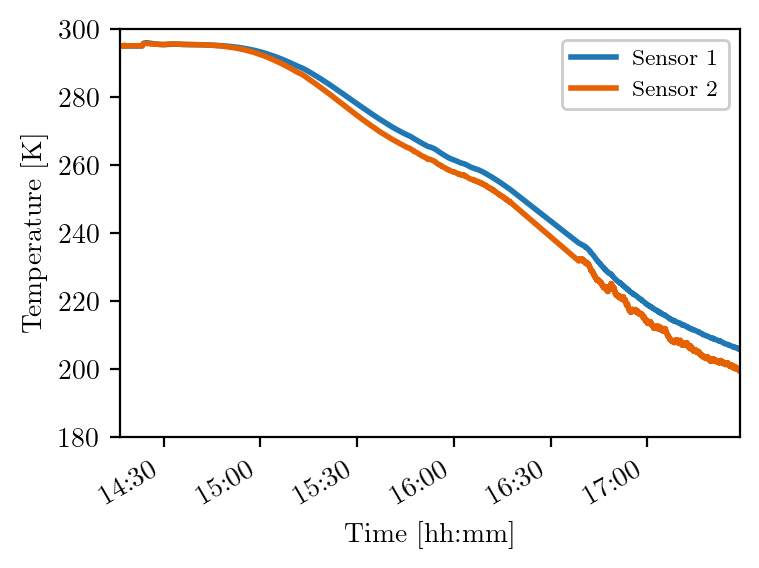

In [5]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
date_form = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

plt.plot(temps[0], temps[1], label='Sensor 1')
plt.plot(temps[0], temps[2], label='Sensor 2')
plt.xlabel('Time [hh:mm]')
plt.ylabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()